Project BIG25 - Nigeria's Food Price Prediction Model

In [1]:
#Installing Prophet openpyxl
pip install pandas matplotlib prophet openpyxl

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 1.5 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/13.3 MB 1.5 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/13.3 MB 1.8 MB/s eta 0:00:07
   ----- ---------------------------------- 1.8/13.3 MB 1.9 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/13.3 MB 2.0 MB/s eta 0:00:06
   -------- ------------------------------- 2.9/13.3 MB 2.5 MB/s eta 0:00:05
   -------- ------------------------------- 2.9/13.3 MB 2.5 MB/s eta 0:00:05
   ------------ --------------------------- 4.2/13.3 MB 2.5 MB/s eta 0:00:04
   -------------- ----------------

In [24]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing pandas
import pandas as pd

In [ ]:
# Reading csv file
df = pd.read_csv(r"C:\Users\namauser\OneDrive\Desktop\Project_BIG_25\Food Price Prediction\Modified\ALL_MONTHS_DATA.csv")

In [3]:
# Viewing top 5 rows
df.head()

,Date,Item_label,Region,Price,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,01/02/2024,Agric eggs medium size,NORTH CENTRAL,1677.828635,NaN,NaN,NaN,NaN
1,01/02/2024,Agric eggs medium size,NORTH EAST,1415.044171,NaN,NaN,NaN,NaN
2,01/02/2024,Agric eggs medium size,NORTH WEST,1428.630102,NaN,NaN,NaN,NaN
3,01/02/2024,Agric eggs medium size,SOUTH EAST,1511.728989,NaN,NaN,NaN,NaN
4,01/02/2024,Agric eggs medium size,SOUTH SOUTH,1423.055556,NaN,NaN,NaN,NaN


In [4]:
# Dropping unnamed columns
df.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis=1, inplace=True)

In [5]:
df.head()

,Date,Item_label,Region,Price
0,01/02/2024,Agric eggs medium size,NORTH CENTRAL,1677.828635
1,01/02/2024,Agric eggs medium size,NORTH EAST,1415.044171
2,01/02/2024,Agric eggs medium size,NORTH WEST,1428.630102
3,01/02/2024,Agric eggs medium size,SOUTH EAST,1511.728989
4,01/02/2024,Agric eggs medium size,SOUTH SOUTH,1423.055556


#### FILTERING FOR PRICE OF RICE IN SOUTH EAST 

In [16]:
# Filter for one item and region 
rice_se = df[(df['Item_label'].str.contains('Rice', case=True, na=False)) & (df['Region'] == 'SOUTH EAST')]

In [17]:
rice_se.head()

,Date,Item_label,Region,Price
51,01/02/2024,Broken Rice (Ofada),SOUTH EAST,1318.760396
195,01/02/2024,Rice agric sold loose,SOUTH EAST,1352.176023
201,01/02/2024,Rice local sold loose,SOUTH EAST,1277.362081
207,01/02/2024,Rice Medium Grained,SOUTH EAST,1350.119246
213,01/02/2024,"Rice,imported high quality sold loose",SOUTH EAST,1648.610523


*The type of rice being used in our prediction includes Ofada rice, agric rice, local rice, medium-grained rice, and imported high-quality rice*

In [18]:
# Extraction of important columns for Prophet
forecast_df = rice_se[['Date', 'Price']].copy()
#Renaming columns
forecast_df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

In [19]:
forecast_df.head()

,ds,y
51,01/02/2024,1318.760396
195,01/02/2024,1352.176023
201,01/02/2024,1277.362081
207,01/02/2024,1350.119246
213,01/02/2024,1648.610523


#### TRAINING THE MODEL

In [20]:
# Importing Prophet
from prophet import Prophet
# Initialize the model
model = Prophet()
# Fit the model to your data
model.fit(forecast_df)

14:58:29 - cmdstanpy - INFO - Chain [1] start processing
14:58:30 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
forecast_df.shape

(45, 2)

In [22]:
forecast_df.head()

,ds,y
51,01/02/2024,1318.760396
195,01/02/2024,1352.176023
201,01/02/2024,1277.362081
207,01/02/2024,1350.119246
213,01/02/2024,1648.610523


#### CREATING FUTURE DATES TO FORECAST

In [28]:
# Setting up future dataframe
future = model.make_future_dataframe(periods=6, freq='ME') # ME --> Month End (Updated)
# forecasting
forecast = model.predict(future)
# viewing key results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)

,ds,yhat,yhat_lower,yhat_upper
9,2024-01-31,4912.509960,4594.685555,5201.509332
10,2024-02-29,8587.786315,8274.865135,8897.894981
11,2024-03-31,12516.530004,12217.005178,12800.093922
12,2024-04-30,16318.540025,16025.041482,16614.581346
13,2024-05-31,20247.283714,19942.907502,20549.218497
14,2024-06-30,24049.293736,23758.309216,24372.641294


**Note:** Prophet seems to be outputting the wrong year. As the predicted years should be in 2025 and not 2024 (since the latest data is from Dec 2024). The predicted values however seem reasonable and thus only the years should be interpreted differently (as 2025 and not 2024).

#### Visualization

In [24]:
import matplotlib.pyplot as plt

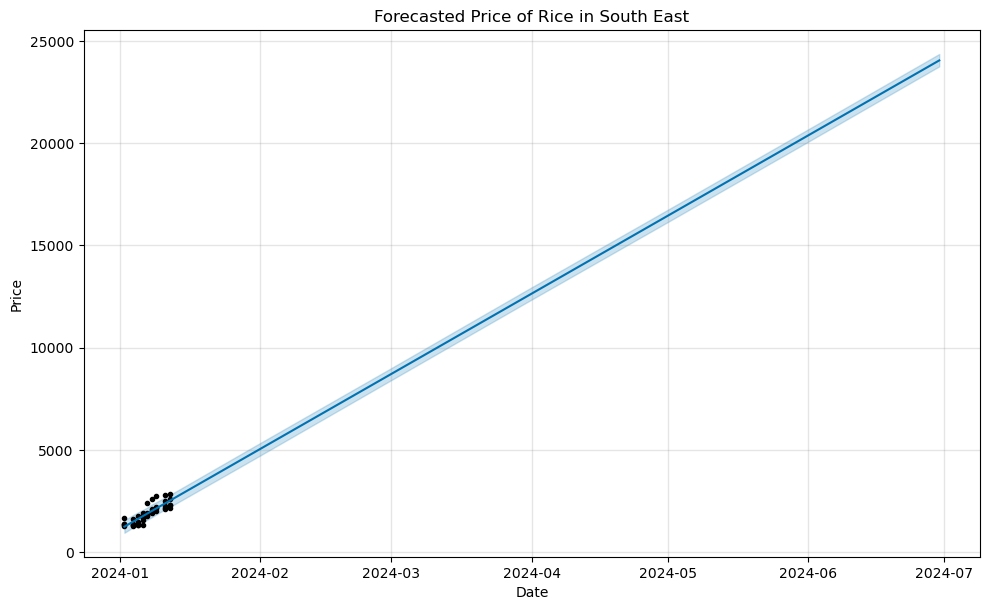

In [27]:
model.plot(forecast)
plt.title("Forecasted Price of Rice in South East")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_excel("rice_forecast_southeast.xlsx", index=False)
